In [52]:
!ls data/transit_lines

cities.csv  station_lines.csv  systems.csv	tracks.csv
lines.csv   stations.csv       track_lines.csv


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
station_lines[station_lines['line_id'] == 343 ]

,id,station_id,line_id,city_id,created_at,updated_at
2288,2389,4019,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
2295,2396,4014,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
2304,2405,4022,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
2311,2412,4016,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
2312,2413,4017,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
14981,7843,3926,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
14984,7846,3922,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
14985,7847,3950,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
14986,7848,3924,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00
14992,7854,3928,343,252,2017-11-21 00:00:00,2017-11-21 00:00:00


In [85]:
transit = ['data/transit_lines/cities.csv', 'data/transit_lines/lines.csv', 
           'data/transit_lines/station_lines.csv', 'data/transit_lines/stations.csv', 
           'data/transit_lines/systems.csv', 'data/transit_lines/track_lines.csv', 
           'data/transit_lines/tracks.csv']
cities, lines, station_lines, stations, systems, track_lines, tracks = [pd.read_csv(i) for i in transit]
# lines = pd.read_csv('data/transit_lines/lines.csv')
# station_lines.csv = pd.read_csv('data/transit_lines/statlines.csv')
stations

82      370
139     374
107     404
78      467
1       685
95      902
69      911
206    1148
91     1278
114    3335
Name: city_id, dtype: int64

In [87]:
stations=stations.dropna(subset=['closure','name','opening'])



In [88]:
stations.city_id.value_counts()[:10].sort_values()

71      291
4       324
82      369
139     372
78      467
1       598
95      893
206    1146
91     1278
114    3335
Name: city_id, dtype: int64

In [115]:
stations=stations.dropna(subset=['closure','name','opening'])
stations=stations[stations.closure>=9999]
stations=stations[stations.opening>0]
stations=stations[stations.opening<=2030]
stations.columns=['id','stations_name','geometry','buildstart','opening','closure','city_id']
stations['Long']=stations['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[0])
stations['Lat']=stations['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(')')[0])
id_country=pd.DataFrame({'city_id':cities.id,'country':cities.country,'name':cities.name})

stations=pd.merge(stations,id_country)
stations.head()

,id,stations_name,geometry,buildstart,opening,closure,city_id,Long,Lat,country,name
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo
1,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114,140.042146725175,35.6726021159981,Japan,Tokyo
2,7696,Keisei Makuhari,POINT(140.056077093286 35.6605591225961),1921.0,1921.0,999999.0,114,140.056077093286,35.6605591225961,Japan,Tokyo
3,7697,Kemigawa,POINT(140.066304589107 35.6526280375642),1921.0,1921.0,999999.0,114,140.066304589107,35.6526280375642,Japan,Tokyo
4,7698,Keisei Inage,POINT(140.085607402414 35.6378035803563),1921.0,1921.0,999999.0,114,140.085607402414,35.6378035803563,Japan,Tokyo


In [146]:
stations.name.value_counts()[:10].sort_values()
top10l = ['Tokyo', 'Osaka', 'New York', 'Paris', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Bordeaux', 'Nantes'] 

#top10l = ['Tokyo', 'Osaka', 'New Yo', 'Pads', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Bordeaux', 'Nantes'] 
#stations.loc[stations['name'] == 'Tokyo' stations.name.value_counts()[:10].sort_values()
#top10l = ['Tokyo', 'Osaka', 'New York', 'Paris', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Bordeaux', 'Nantes'] 

#top10l = ['Tokyo', 'Osaka', 'New Yo', 'Pads', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Bordeaux', 'Nantes'] 

#top10l = ['Tokyo', 'Osaka', 'New Yo', 'Pads', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Bordeaux', 'Nantes'] 
stations.loc[(stations['name'] == 'Tokyo') | (stations['name'] =='Osaka') | (stations['name'] =='New York') | (stations['name'] =='Paris') | (stations['name'] =='Buenos Aires') | (stations['name'] =='Mexico City') | (stations['name'] =='Santiago') | (stations['name'] =='Madrid') | (stations['name'] =='London') | (stations['name'] =='Bordeaux') | (stations['name'] =='Nantes')]
top10 = stations.loc[(stations['name'] == 'Tokyo') | (stations['name'] =='Osaka') | (stations['name'] =='New York') | (stations['name'] =='Paris') | (stations['name'] =='Buenos Aires') | (stations['name'] =='Mexico City') | (stations['name'] =='Santiago') | (stations['name'] =='Madrid') | (stations['name'] =='London') | (stations['name'] =='Bordeaux')]
top10.groupby('name').min()

,id,stations_name,geometry,buildstart,opening,closure,city_id,Long,Lat,country
name,,,,,,,,,,
Bordeaux,7119,Achard,POINT(-0.508902151566161 44.8507616856812),2000.0,2003.0,999999.0,23,-0.508902151566161,44.786707,France
Buenos Aires,2,2 de Abril,POINT(-57.949972578228 -34.9041607543767),1854.0,1857.0,999999.0,1,-57.949972578228,-34.0975461818748,Argentina
London,782,\n\nBank,POINT(-0.00183440503215593 51.5414137189596),0.0,1837.0,999999.0,69,-0.00183440503215593,51.214296262545,England
Madrid,309,\nBanco de España,POINT(-3.44737331884048 40.3041152086121),1916.0,1919.0,99999.0,71,-3.44737331884048,40.2850041713918,Spain
Mexico City,688,314. Memorial New's Divine,POINT(-98.9610129917324 19.3506617778139),1967.0,1969.0,999999.0,78,-98.9610129917324,19.2594444549942,Mexico
New York,10604,\tFlushing–Main Street,POINT(-72.7046323775394 40.8212159727988),1837.0,1837.0,99999.0,206,-72.7046323775394,40.5124779079701,United States
Osaka,9734,Abeno,POINT(134.675381391641 34.7997736235333),1874.0,1874.0,999999.0,91,134.675381391641,34.0860530658764,Japan
Paris,4288,\tStade Yves du Manoir,POINT(2.01154465890411 49.0483366468214),-1.0,1900.0,999999.0,95,2.01154465890411,48.7145563,France
Santiago,100,\nEl Golf,POINT(-70.5245292924493 -33.4796243807097),1850.0,1856.0,999999.0,4,-70.5245292924493,-33.3655496689563,Chile


In [171]:
stations.groupby('name')
print (reversed(colors))
c=[]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'black', 'palegreen', 'sienna', 'yellow']

for x in reversed(colors):
    c.append(x)

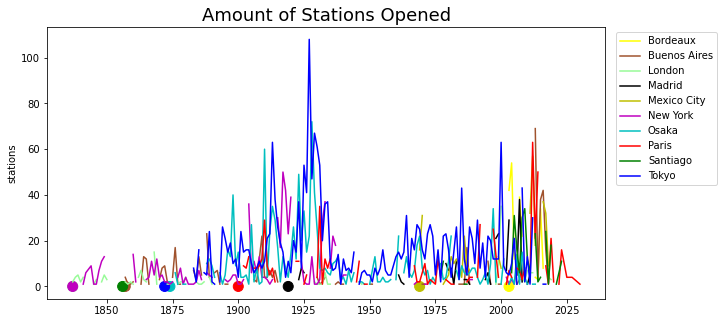

In [184]:
fig,ax=plt.subplots(figsize=(15,8))
top10.groupby(['opening','name'])['stations_name'].agg('count').unstack().plot(ax=ax, figsize = (10,5), color = c)
x = [2003, 1857, 1837, 1919, 1969, 1837, 1874, 1900, 1856, 1872]
y =  [0,0,0,0,0,0,0,0,0,0]
plt.legend(loc=0, bbox_to_anchor=(1.01,1))
ax.scatter(x,y, marker = 'o', s=100, c = c)
plt.xlabel('')
plt.ylabel('stations')
plt.title("Amount of Stations Opened",size=18)
plt.savefig('Amount of Stations Opened')